In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler # Testing only, implement later
from utils.LinearRegressionModel import LinearRegressionModel

In [2]:
df = pd.read_csv('./data/data.csv')
df

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250
5,114800,5350
6,166800,5800
7,89000,5990
8,144500,5999
9,84000,6200


In [3]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

km_scaled = pd.Series(scaler_x.fit_transform(df[['km']]).flatten())
price_scaled = pd.Series(scaler_y.fit_transform(df[['price']]).flatten())

model = LinearRegressionModel(epoch=1000)
model.fit(km_scaled, price_scaled)

100%|██████████| 1000/1000 [00:00<00:00, 76158.99it/s]


In [4]:
km_value = 240000

km_scaled = scaler_x.transform([[km_value]])[0][0]
prediction_scaled = model.predict(km_scaled)
scaler_y.inverse_transform([[prediction_scaled]])[0][0]

c:\Users\ADMIN\anaconda3\envs\py310-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(4447.575218237783)

c:\Users\ADMIN\anaconda3\envs\py310-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\py310-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\py310-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


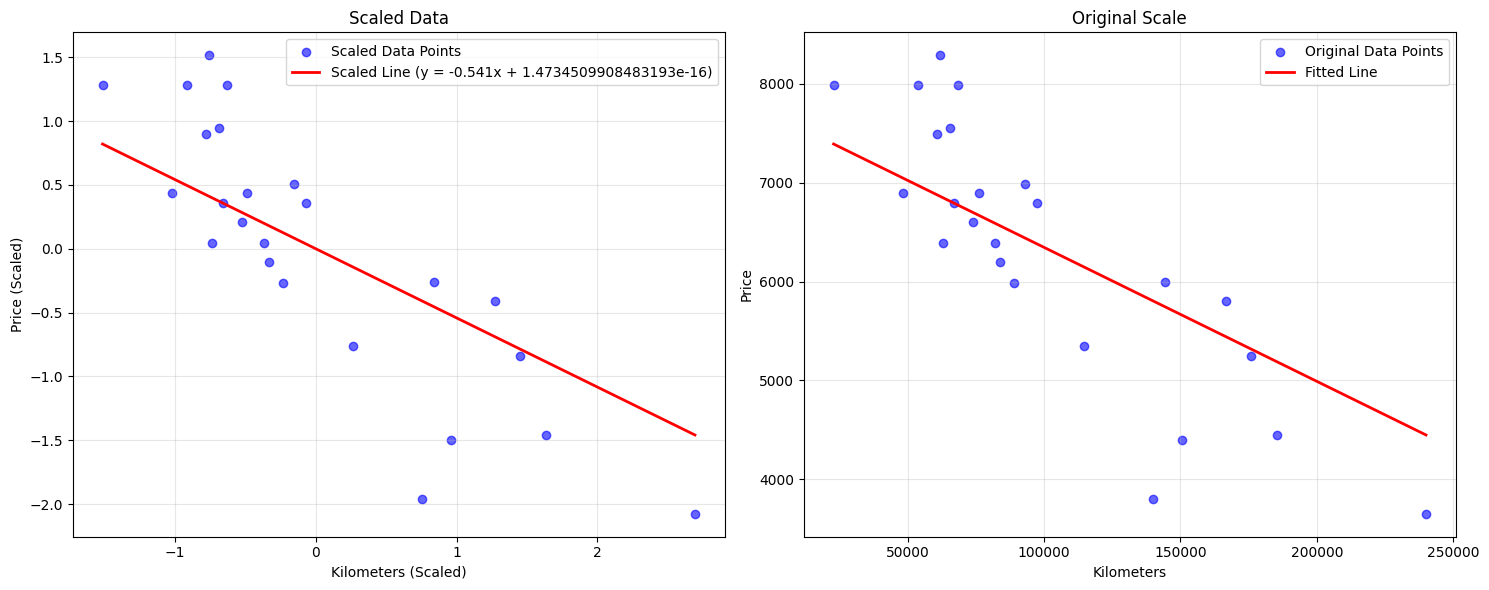

In [7]:
def plot_scaled_regression_results(model, x_original, y_original, scaler_x, scaler_y, 
                                  x_label="X", y_label="Y", title="Linear Regression (Scaled Data)"):
    """
    Plot results when using scaled data - shows both scaled and original scale plots
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Left plot: Scaled data
    x_scaled = scaler_x.transform(x_original.values.reshape(-1, 1)).flatten()
    y_scaled = scaler_y.transform(y_original.values.reshape(-1, 1)).flatten()
    
    ax1.scatter(x_scaled, y_scaled, alpha=0.6, color='blue', label='Scaled Data Points')
    
    x_line_scaled = np.linspace(x_scaled.min(), x_scaled.max(), 100)
    y_line_scaled = model.predict(x_line_scaled)
    
    ax1.plot(x_line_scaled, y_line_scaled, color='red', linewidth=2,
             label=f'Scaled Line (y = {model.get_slope():.3f}x + {model.get_y_intercept()})')
    
    ax1.set_xlabel(f'{x_label} (Scaled)')
    ax1.set_ylabel(f'{y_label} (Scaled)')
    ax1.set_title('Scaled Data')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Right plot: Original scale
    ax2.scatter(x_original, y_original, alpha=0.6, color='blue', label='Original Data Points')
    
    x_line_original = np.linspace(x_original.min(), x_original.max(), 100)
    # Transform to scaled space, predict, then transform back
    x_line_scaled_for_pred = scaler_x.transform(x_line_original.reshape(-1, 1)).flatten()
    y_line_scaled_pred = model.predict(x_line_scaled_for_pred)
    y_line_original = scaler_y.inverse_transform(y_line_scaled_pred.reshape(-1, 1)).flatten()
    
    ax2.plot(x_line_original, y_line_original, color='red', linewidth=2, label='Fitted Line')
    
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.set_title('Original Scale')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_scaled_regression_results(model, df['km'], df['price'], scaler_x, scaler_y,
                              x_label="Kilometers", y_label="Price",
                              title="Car Price vs Kilometers")